In [20]:
import netCDF4 as nc
import pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid

In [21]:
#extract data and separate variables
data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_cl.nc')
cl = data.variables['cl']
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]

In [22]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    source: Data from Met Office Unified Model
    um_version: 7.3
    Conventions: CF-1.5
    history: Fri Feb  3 15:43:40 2017: ncrcat /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmq1_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmq2_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmq3_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmq4_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmq5_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmq6_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmq7_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmq8_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmq9_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltln/netcdf/xltln_pmr0_cl.nc /group_workspaces/jasmin2/ukca/vol2/ih280/xltl

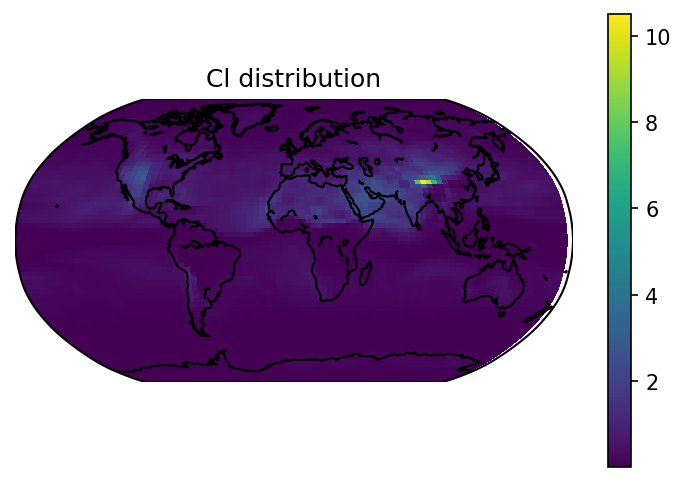

In [23]:
#make world map plot
plt.figure(dpi=150)
map = Basemap(projection='robin', lon_0=0.)
map.drawcoastlines()

cl, lon = shiftgrid(180.,cl,lon,start=False)
lonx,laty = np.meshgrid(lon,lat)
x,y=map(lonx,laty)

cs = map.pcolormesh(x,y,cl[3,0,:,:]*28.8/35.5*1e18)

plt.title('Cl distribution')
plt.colorbar()
plt.show()


Text(0, 0.5, 'Model height')

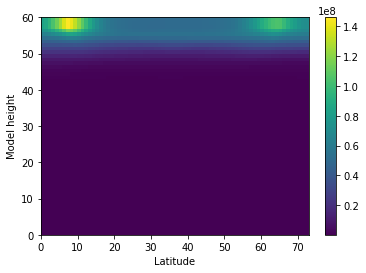

In [63]:
plt.pcolormesh(np.mean(data.variables['cl'][:]*28.8/35.5*1e18, axis=(0,3)))
#average over axes 0:time and 3:longitude to get zonal mean
plt.colorbar()

plt.xlabel('Latitude')
plt.ylabel('Model height')